# Exploratory Data Analysis for Disabilities Dataset in Ecuador
Date: September 26th, 2024.

### Import the necessary libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Upload

The dataset to be implemented corresponds to the [Registro Nacional de Discapacidades  del Ecuador](https://www.datosabiertos.gob.ec/dataset/registro-nacional-de-discapacidades/resource/47dae383-9318-4dc6-a5b0-f98049332677) which contains information on persons with disabilities at the national level who are registered with the Ministry of Public Health (MSP) in Ecuador. The data dictionary is as follows:

- Recuento: Number of people with disabilities.
- Grado de Discapacidad: Degree or percentage of disability a person has, which is grouped by degree of disability.
- Género: Gender of the person with disability.
- Provincia: Province where the person with disability lives.
- Grupo Etareo: Age of the person with disability, which is grouped by age range.
- Tipo de Discapacidad: Type of disability the person has.

In [ ]:
df = pd.read_csv('Registro_Discapacidades_Ecuador.csv')
df.head()

,Recuento,Grado de Discapacidad,Género,Provincia,Grupo Etareo,Tipo de Discapacidad
0,1,De 75% a 84%,Masculino,Imbabura,De 36 a 64 años,Física
1,1,De 75% a 84%,Masculino,Pichincha,De 36 a 64 años,Física
2,1,De 50% a 74%,Femenino,Pichincha,De 65 años en adelante,Física
3,1,De 50% a 74%,Femenino,Pichincha,De 65 años en adelante,Física
4,1,De 75% a 84%,Masculino,Carchi,De 65 años en adelante,Física


### Value Count by Category

In [22]:
conteo_tipo_discapacidad = df['Tipo de Discapacidad'].value_counts()
conteo_tipo_discapacidad

Tipo de Discapacidad
Física         215156
Intelectual    108957
Auditiva        66538
Visual          54397
Psicosocial     26157
Name: count, dtype: int64

In [23]:
conteo_grado_discapacidad = df['Grado de Discapacidad'].value_counts()
conteo_grado_discapacidad

Grado de Discapacidad
De 30% a 49%     215408
De 50% a 74%     162687
De 75% a 84%      65560
De 85% a 100%     27550
Name: count, dtype: int64

In [24]:
conteo_grupo_etareo = df['Grupo Etareo'].value_counts()
conteo_grupo_etareo

Grupo Etareo
De 36 a 64 años           191884
De 65 años en adelante    118355
De 25 a 35 años            63346
De 19 a 24 años            36817
De 13 a 18 años            32902
De 7 a 12 años             21114
De 4 a 6 años               4948
De 0 a 3 años               1839
Name: count, dtype: int64

We found that there is no erroneous value within the variables of interest for the study.

### Descriptive Analysis

Summary of the categorical columns in the DataFrame, including information such as:
- count: number of non-null values.
- unique: number of unique categories.
- top: most frequent category.
- freq: frequency of the most frequent category.

In [7]:
df.describe(include=['object', 'category'])

,Grado de Discapacidad,Género,Provincia,Grupo Etareo,Tipo de Discapacidad
count,471205,471205,471205,471205,471205
unique,4,3,25,8,5
top,De 30% a 49%,Masculino,Guayas,De 36 a 64 años,Física
freq,215408,264463,117471,191884,215156


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471205 entries, 0 to 471204
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Recuento               471205 non-null  int64 
 1   Grado de Discapacidad  471205 non-null  object
 2   Género                 471205 non-null  object
 3   Provincia              471205 non-null  object
 4   Grupo Etareo           471205 non-null  object
 5   Tipo de Discapacidad   471205 non-null  object
dtypes: int64(1), object(5)
memory usage: 21.6+ MB


The type of data for the study variables corresponds to the nature of the variables. In this case, we will define our target variable as 'Type of Disability'.

In [9]:
df.isnull().sum()

Recuento                 0
Grado de Discapacidad    0
Género                   0
Provincia                0
Grupo Etareo             0
Tipo de Discapacidad     0
dtype: int64

There are no null values within the study variables.

## Visualization

### Distribution of Degree of Disability

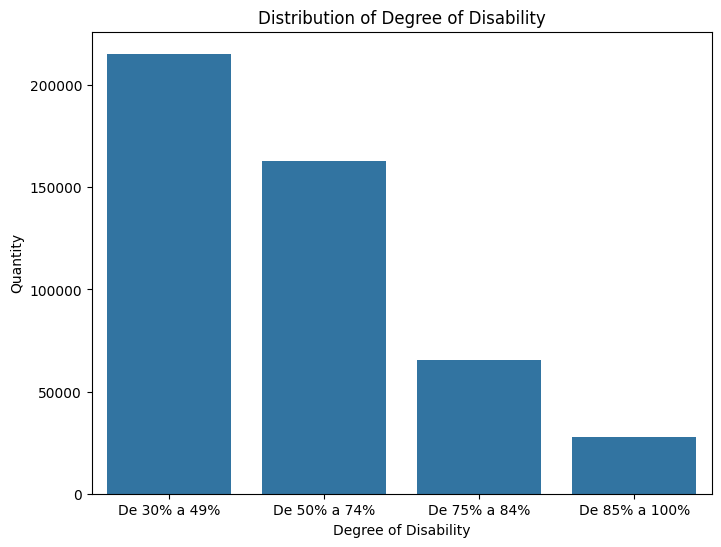

In [13]:
orden_grados = ['De 30% a 49%', 'De 50% a 74%', 'De 75% a 84%', 'De 85% a 100%']

df['Grado de Discapacidad'] = pd.Categorical(df['Grado de Discapacidad'], categories=orden_grados, ordered=True)

plt.figure(figsize=(8, 6))
sns.countplot(x='Grado de Discapacidad', data=df)
plt.title('Distribution of Degree of Disability')
plt.xlabel('Degree of Disability')
plt.ylabel('Quantity')
plt.show()


Most of the data is contained in the 30% to 49% group. As the percentage of disability increases, the number of people decreases. This indicates that as the disability becomes more severe, fewer people are experiencing it.

### Analysis according to Provinces:

#### Proportion of People with Disabilities by Province

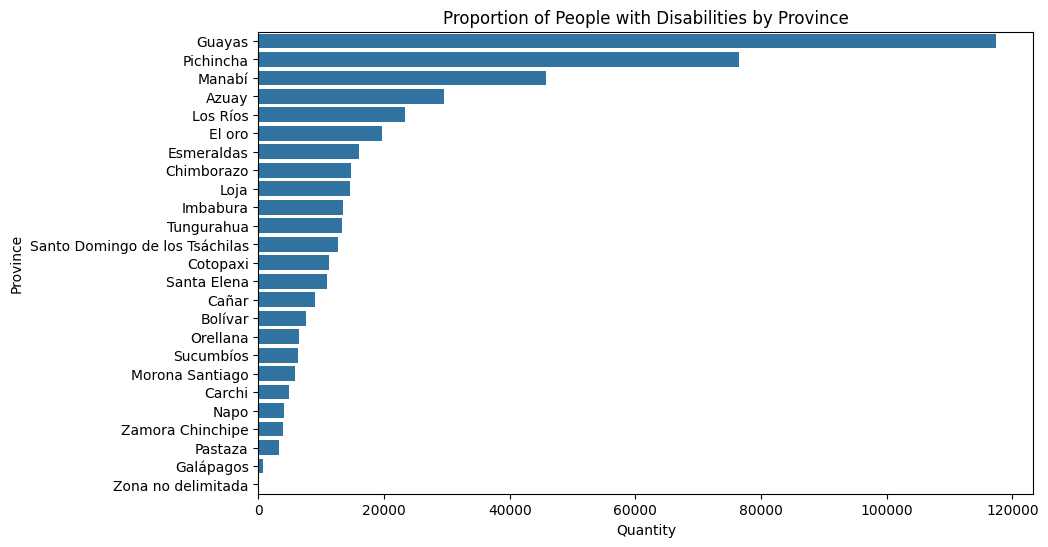

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Provincia', data=df, order=df['Provincia'].value_counts().index)
plt.title('Proportion of People with Disabilities by Province')
plt.xlabel('Quantity')
plt.ylabel('Province')
plt.show()


The provinces of Guayas and Pichincha have the highest number of people with disabilities. This could be due to several factors such as a larger total population, better registration systems or a higher incidence of risk factors. On the other hand, there is great variability in the number of people with disabilities among the different provinces. Some provinces have significantly more people with disabilities compared to others.

#### Relationship between Province and Type of Disability

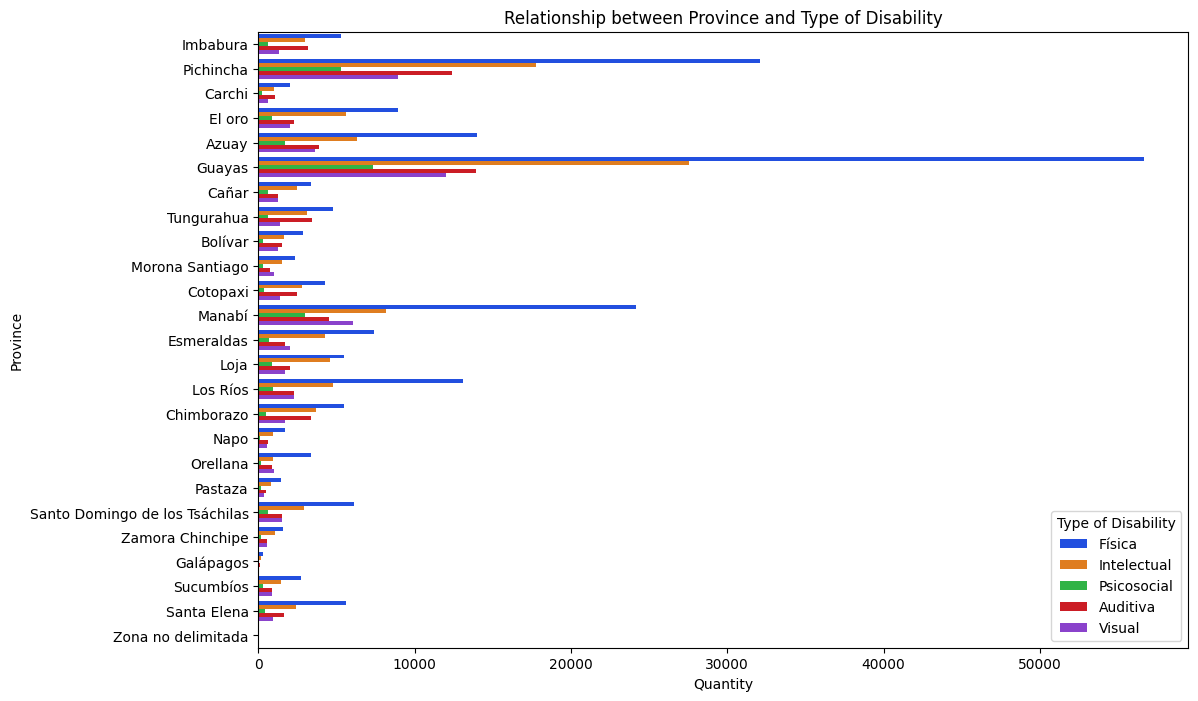

In [15]:
plt.figure(figsize=(12, 8))
sns.countplot(y='Provincia', hue='Tipo de Discapacidad', data=df, palette='bright')
plt.title('Relationship between Province and Type of Disability')
plt.xlabel('Quantity')
plt.ylabel('Province')
plt.legend(title='Type of Disability')
plt.show()


In general, physical disabilities appear to be the most common in most provinces. Some provinces have a higher proportion of people with physical disabilities, while others have a higher proportion of people with intellectual or psychosocial disabilities.

### Analysis according to Gender:

#### Relationship between Gender and Degree of Disability

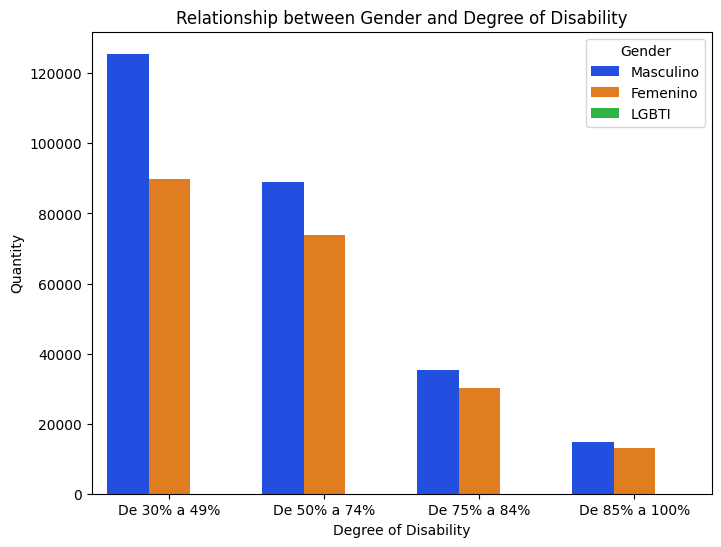

In [16]:
orden_grados = ['De 30% a 49%', 'De 50% a 74%', 'De 75% a 84%', 'De 85% a 100%']
df['Grado de Discapacidad'] = pd.Categorical(df['Grado de Discapacidad'], categories=orden_grados, ordered=True)

plt.figure(figsize=(8, 6))
sns.countplot(x='Grado de Discapacidad', hue='Género', data=df, palette='bright')
plt.title('Relationship between Gender and Degree of Disability')
plt.xlabel('Degree of Disability')
plt.ylabel('Quantity')
plt.legend(title='Gender') 
plt.show()

 In general, there appears to be a greater number of men with disabilities compared to women in all ranges of degree of disability. Also, as the degree of disability increases, the number of people in all genders decreases. This is to be expected, as more severe disabilities tend to be less frequent.

#### Gender Ratio by Type of Disability

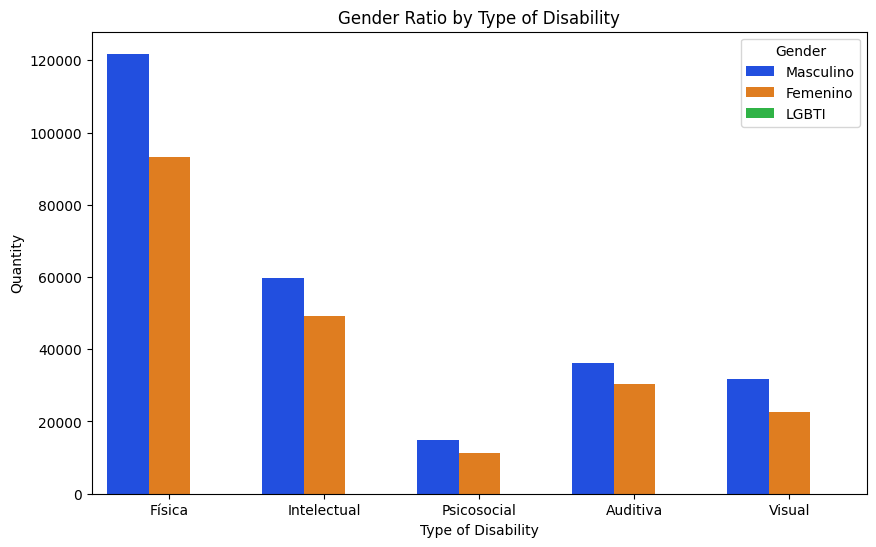

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Tipo de Discapacidad', hue='Género', data=df, palette='bright')
plt.title('Gender Ratio by Type of Disability')
plt.xlabel('Type of Disability')
plt.ylabel('Quantity')
plt.legend(title='Gender') 
plt.show()


In general, there seems to be a greater number of people with physical disabilities in all genders. In relation to this, a higher proportion of men with physical disabilities and a higher proportion of women with intellectual disabilities.

### Analysis according to age group:

#### Distribution of Type of Disability by Age Group

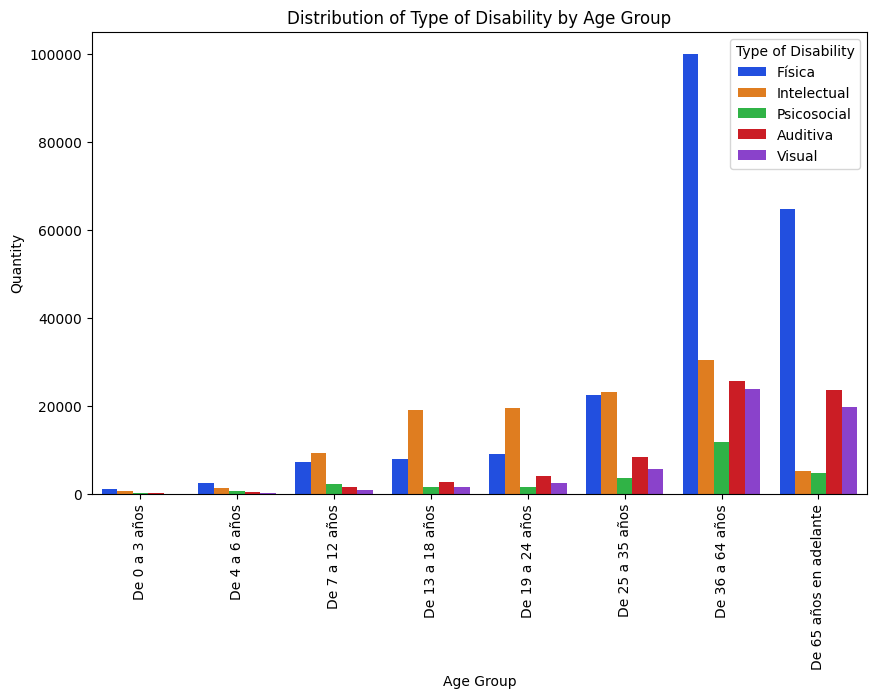

In [19]:
orden_grupos_etarios = [
    'De 0 a 3 años',
    'De 4 a 6 años',
    'De 7 a 12 años',
    'De 13 a 18 años',
    'De 19 a 24 años',
    'De 25 a 35 años',
    'De 36 a 64 años',
    'De 65 años en adelante'
]


df['Grupo Etareo'] = pd.Categorical(df['Grupo Etareo'], categories=orden_grupos_etarios, ordered=True)

plt.figure(figsize=(10, 6))
sns.countplot(x='Grupo Etareo', hue='Tipo de Discapacidad', data=df, palette='bright')
plt.title('Distribution of Type of Disability by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Quantity')
plt.xticks(rotation=90)
plt.legend(title='Type of Disability')
plt.show()


 We observed that physical disability is more prevalent in the adult age groups, especially in the 36-64 age group. In general, the number of people with disabilities increases with advancing age, which is to be expected due to factors such as aging and the development of chronic diseases.

#### Relationship between Degree of Disability and Age Group

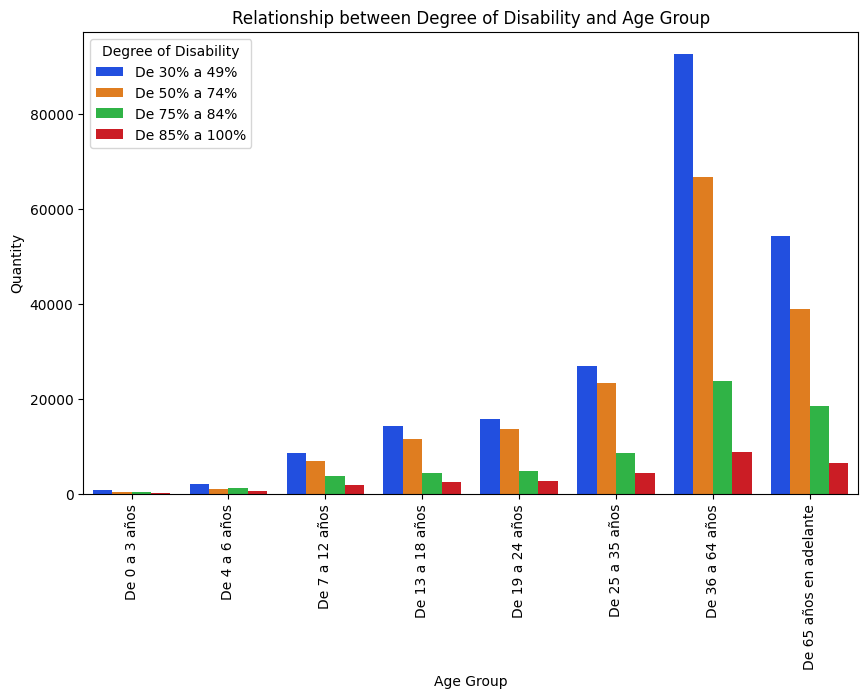

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Grupo Etareo', hue='Grado de Discapacidad', data=df, palette='bright')
plt.title('Relationship between Degree of Disability and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Quantity')
plt.xticks(rotation=90)
plt.legend(title='Degree of Disability')
plt.show()


We observe that the number of people increases as age increases, especially in the 65 years and older age group. It can also be observed that the age group from 36 to 64 years old has the highest number of people with disability percentages between 30% and 49%, as well as between 50% and 74%, respectively.

## Preliminary conclusions

As for the data, they are structured in an optimal way and do not present notable errors that require an exhaustive cleaning. The data obtained from the dataset features help to understand the reality of people with disabilities in Ecuador and their characteristics regarding the percentage of disability, gender, typology, and their presence throughout the national territory.

After the analysis we can draw the following preliminary conclusions from the dataset information:

- It is evident that the prevalence of disability increases with age. This is especially noticeable in physical disabilities and in higher degrees of disability.

- Disability is not a homogeneous phenomenon. There are different types of disability, with different degrees of severity and affecting different age groups in different ways.

- Generally, the degree of disability increases with age, being more common in older adults.
